In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
#load the data
#----- server event ---------
server_event = pd.read_csv('server_event.csv',header=None)
column_names = ['timestamp','machine_id','event_type','event_detail','capacity:CPU','capacity:memory','capacity:disk']
server_event.columns = column_names

#----- server usage ---------
server_usage = pd.read_csv('server_usage.csv',header=None)
column_names = ["timestamp", "machineID", "util:CPU", "util:memory", "util:disk", "load1", "load5", "load15"]
server_usage.columns = column_names

#----- container event ---------
container_event =pd.read_csv('container_event.csv',header=None)
column_names = ['timestamp', 'event', 'instance_id', 'machine_id', 'plan_cpu', 'plan_mem', 'plan_disk', 'cpuset', 'unknown']
container_event.columns = column_names
container_event = container_event.drop(columns=['unknown'], axis=1)

#----- container usage ---------
container_usage = pd.read_csv('container_usage.csv',header=None)
column_names = ['timestamp', 'instance_id', 'cpu_util', 'mem_util', 'disk_util', 'load1', 'load5', 'load15', 'avg_cpi', 'avg_mpki', 'max_cpi', 'max_mpki']
container_usage.columns = column_names

#---- batch instance ---------
batch_instance = pd.read_csv('batch_instance.csv', header=None)
column_names = ['start_timestamp','end_timestamp','job_id','task_id','machine_id','status','seq_no','total_seq_no','real_cpu_max','real_cpu_avg','real_mem_max','real_mem_avg']
batch_instance.columns = column_names

#---- batch task --------
batch_task = pd.read_csv('batch_task.csv',header=None)
column_names = ['create_timestamp','modify_timestamp','job_id','task_id','instance_id','status','plan_cpu','plan_mem']
batch_task.columns = column_names

In [13]:
total_cpu_capacity = server_event['capacity:CPU'].sum()

print("the cluster cpu capacity：", total_cpu_capacity)

the cluster cpu capacity： 84032


In [14]:
container_event

,timestamp,event,instance_id,machine_id,plan_cpu,plan_mem,plan_disk,cpuset
0,0,Create,10000,934,4,0.042409,0.034085,40|41|42|43
1,0,Create,1000,1295,8,0.084819,0.056809,56|57|58|59|60|61|62|63
2,0,Create,10001,668,8,0.084819,0.056809,24|25|26|27|28|29|30|31
3,0,Create,10002,1217,8,0.084819,0.056809,4|5|6|7|8|9|10|11
4,0,Create,10003,1019,4,0.042409,0.034085,36|37|38|39
...,...,...,...,...,...,...,...,...
11097,39374,Create,4597,916,4,0.042409,0.034085,52|53|54|55
11098,39495,Create,6624,921,4,0.042409,0.034085,52|53|54|55
11099,42454,Create,10729,1096,4,0.042409,0.056809,56|57|58|59
11100,42454,Create,3101,1096,4,0.042409,0.056809,60|61|62|63


In [15]:
container_usage

,timestamp,instance_id,cpu_util,mem_util,disk_util,load1,load5,load15,avg_cpi,avg_mpki,max_cpi,max_mpki
0,42900,106,42.84,65.520000,17.140000,3.14,3.40,3.66,0.064628,0.034337,0.726102,0.457576
1,42600,107,3.30,24.000000,5.200000,0.54,0.38,0.30,0.155430,0.550153,2.211467,12.187318
2,42300,108,3.14,25.600000,10.600000,0.08,0.14,0.20,0.199342,0.294852,2.633724,3.997216
3,42000,109,3.82,42.000000,13.900000,0.10,0.16,0.20,0.238470,0.292426,2.203077,2.942878
4,41700,110,5.82,24.900000,7.400000,0.74,0.62,0.60,0.136100,0.161496,1.622428,2.469633
...,...,...,...,...,...,...,...,...,...,...,...,...
1480901,80400,10175,4.32,34.440001,13.840000,0.12,0.18,0.20,0.174103,0.207152,2.024820,2.795278
1480902,80100,10176,3.72,27.180000,6.200000,0.18,0.14,0.10,0.133589,0.169097,1.657425,2.404944
1480903,79800,10177,14.90,52.060001,23.700001,0.76,0.76,0.76,0.085322,0.121745,1.207273,2.280462
1480904,79500,10178,3.20,27.700001,13.000000,0.20,0.20,0.20,0.154083,0.199628,2.690727,4.154834


In [16]:
# Assuming the data is in a DataFrame named "df"
instance_plan_cpu = container_event[['instance_id', 'plan_cpu']]

timestamp_instance = container_usage[['timestamp','instance_id','cpu_util']]

# Merge the dataframes based on the "instance_id" column
merged_df = pd.merge(timestamp_instance,instance_plan_cpu, on='instance_id')

# Sort the DataFrame by the "timestamp" column in ascending order
sorted_df = merged_df.sort_values(by='timestamp')

# used cpu : plan_cpu * (cpu_util *100)
sorted_df['used_cpu'] = sorted_df['plan_cpu'] * (sorted_df['cpu_util'] / 100)

In [17]:
sorted_df

,timestamp,instance_id,cpu_util,plan_cpu,used_cpu
637528,39600,3693,4.32,4,0.1728
1320058,39600,101,3.60,4,0.1440
524907,39600,4055,4.66,4,0.1864
1031880,39600,8389,7.92,16,1.2672
525045,39600,4056,3.28,4,0.1312
...,...,...,...,...,...
1169346,82500,9158,13.70,8,1.0960
585303,82500,5319,3.32,4,0.1328
121423,82500,7798,3.44,4,0.1376
585445,82500,5320,3.96,4,0.1584


In [18]:
# Group by "timestamp" and sum the "plan_cpu" values for each group
result = sorted_df.groupby('timestamp')['plan_cpu','used_cpu'].sum().reset_index()

# Converts the used cpu field to an integer type
result['used_cpu'] = result['used_cpu'].astype(int)

/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_27409/3643281985.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = sorted_df.groupby('timestamp')['plan_cpu','used_cpu'].sum().reset_index()


In [19]:
result

,timestamp,plan_cpu,used_cpu
0,39600,61726,7761
1,39900,61802,7810
2,40200,61822,7607
3,40500,61830,7547
4,40800,61826,7835
...,...,...,...
139,81300,61882,5899
140,81600,61882,5986
141,81900,61882,5947
142,82200,61882,6037


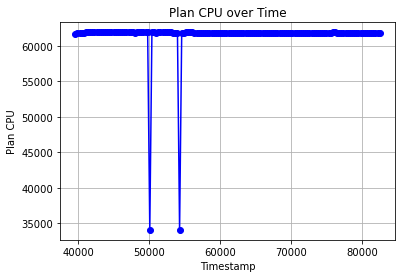

In [20]:
# 创建折线图
plt.plot(result['timestamp'], result['plan_cpu'], marker='o', linestyle='-', color='b')

# 添加标题和标签
plt.title('Plan CPU over Time')
plt.xlabel('Timestamp')
plt.ylabel('Plan CPU')

# 显示图表
plt.grid(True)
plt.show()